In [1]:
#Importing the Necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
patients=pd.read_csv('indian_liver_patient.csv')

In [3]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
patients.shape

(583, 11)

In [5]:
#making the Gender column into numerical format:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [6]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: >

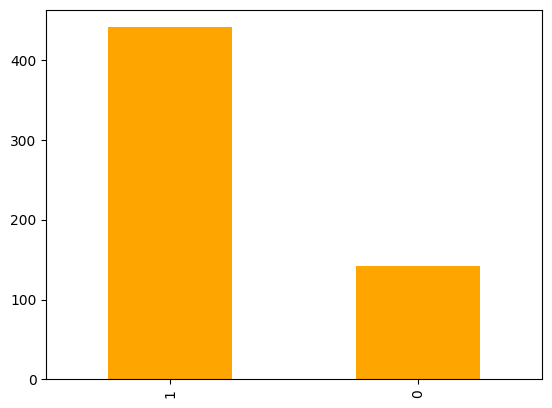

In [7]:
#check the number of male and female using a countplot
patients['Gender'].value_counts().plot.bar(color='orange')

<Axes: >

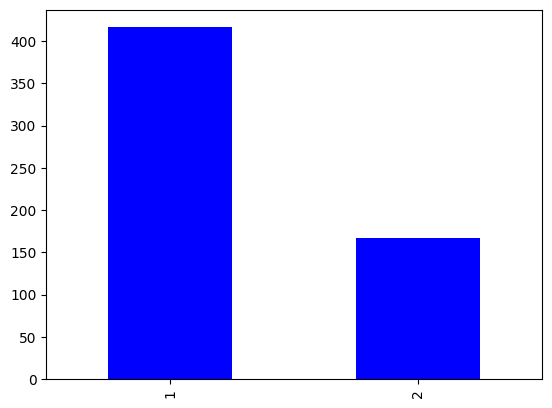

In [8]:
#check the countplot of our Dataset column:
patients['Dataset'].value_counts().plot.bar(color='blue')

In [9]:
#check for the null values:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
#filling the null values by imputing the mean of that column.
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [11]:
patients=patients.fillna(0.94)

In [12]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: >

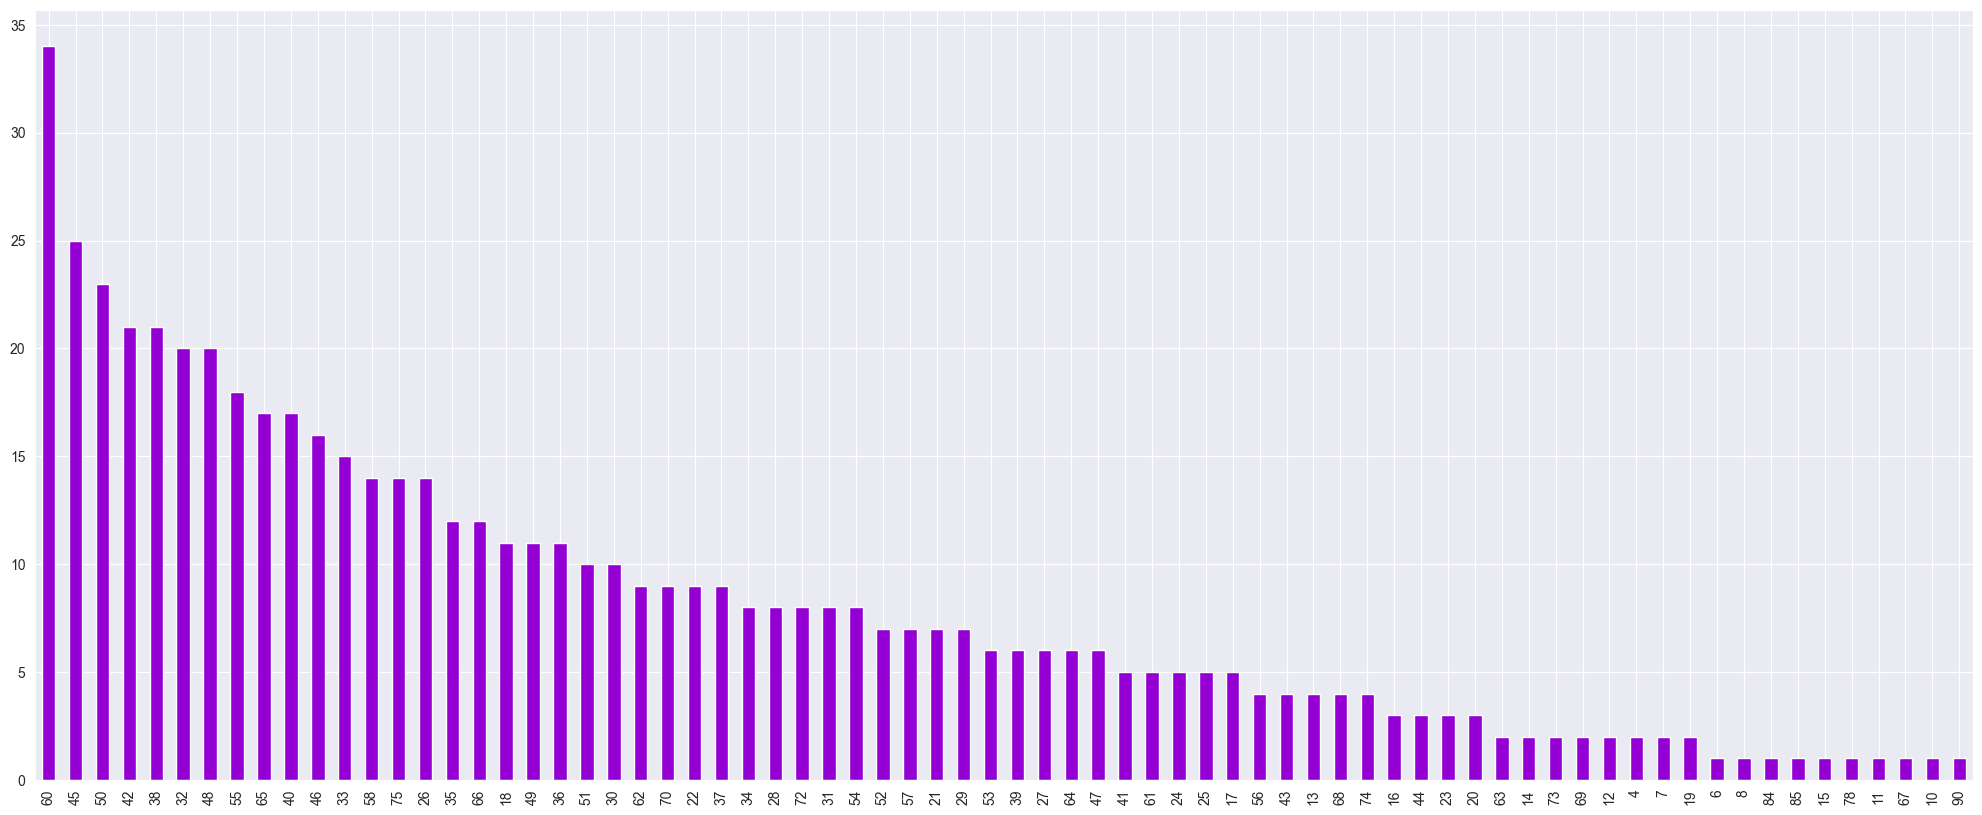

In [13]:
#checking the age group of the patients.
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

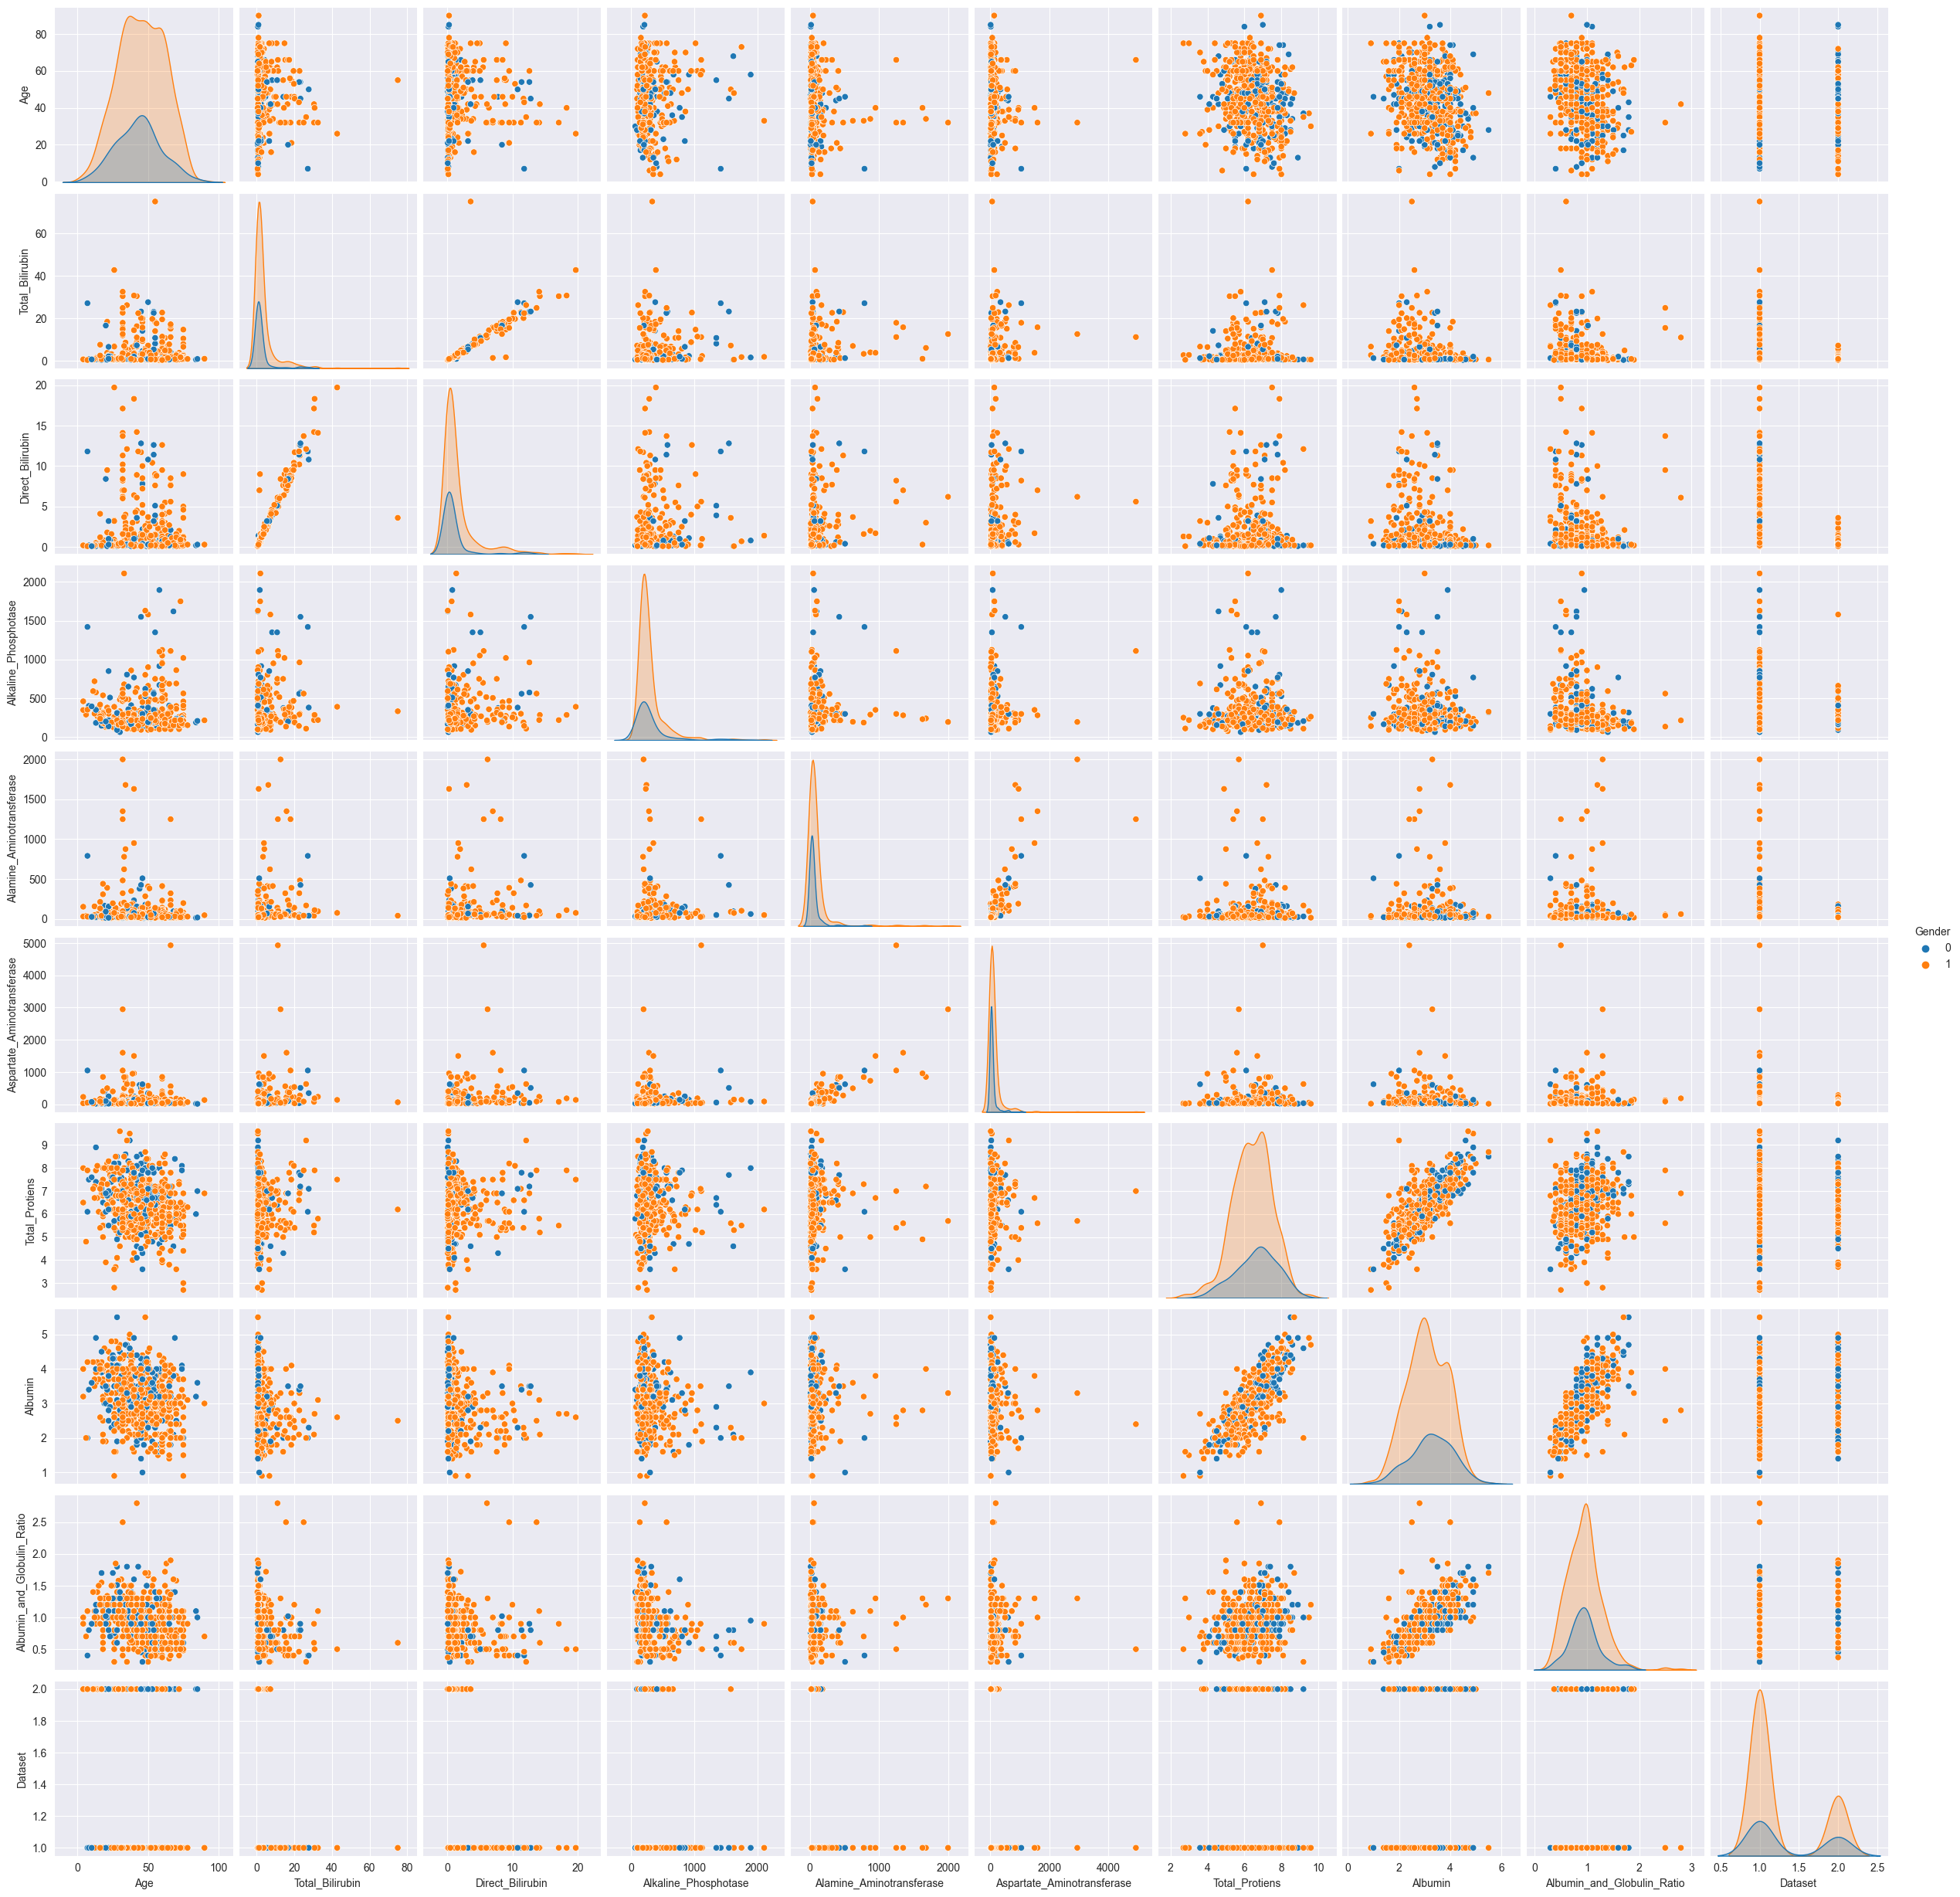

In [14]:
#viewing the pairplot of patients based on Gender.
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

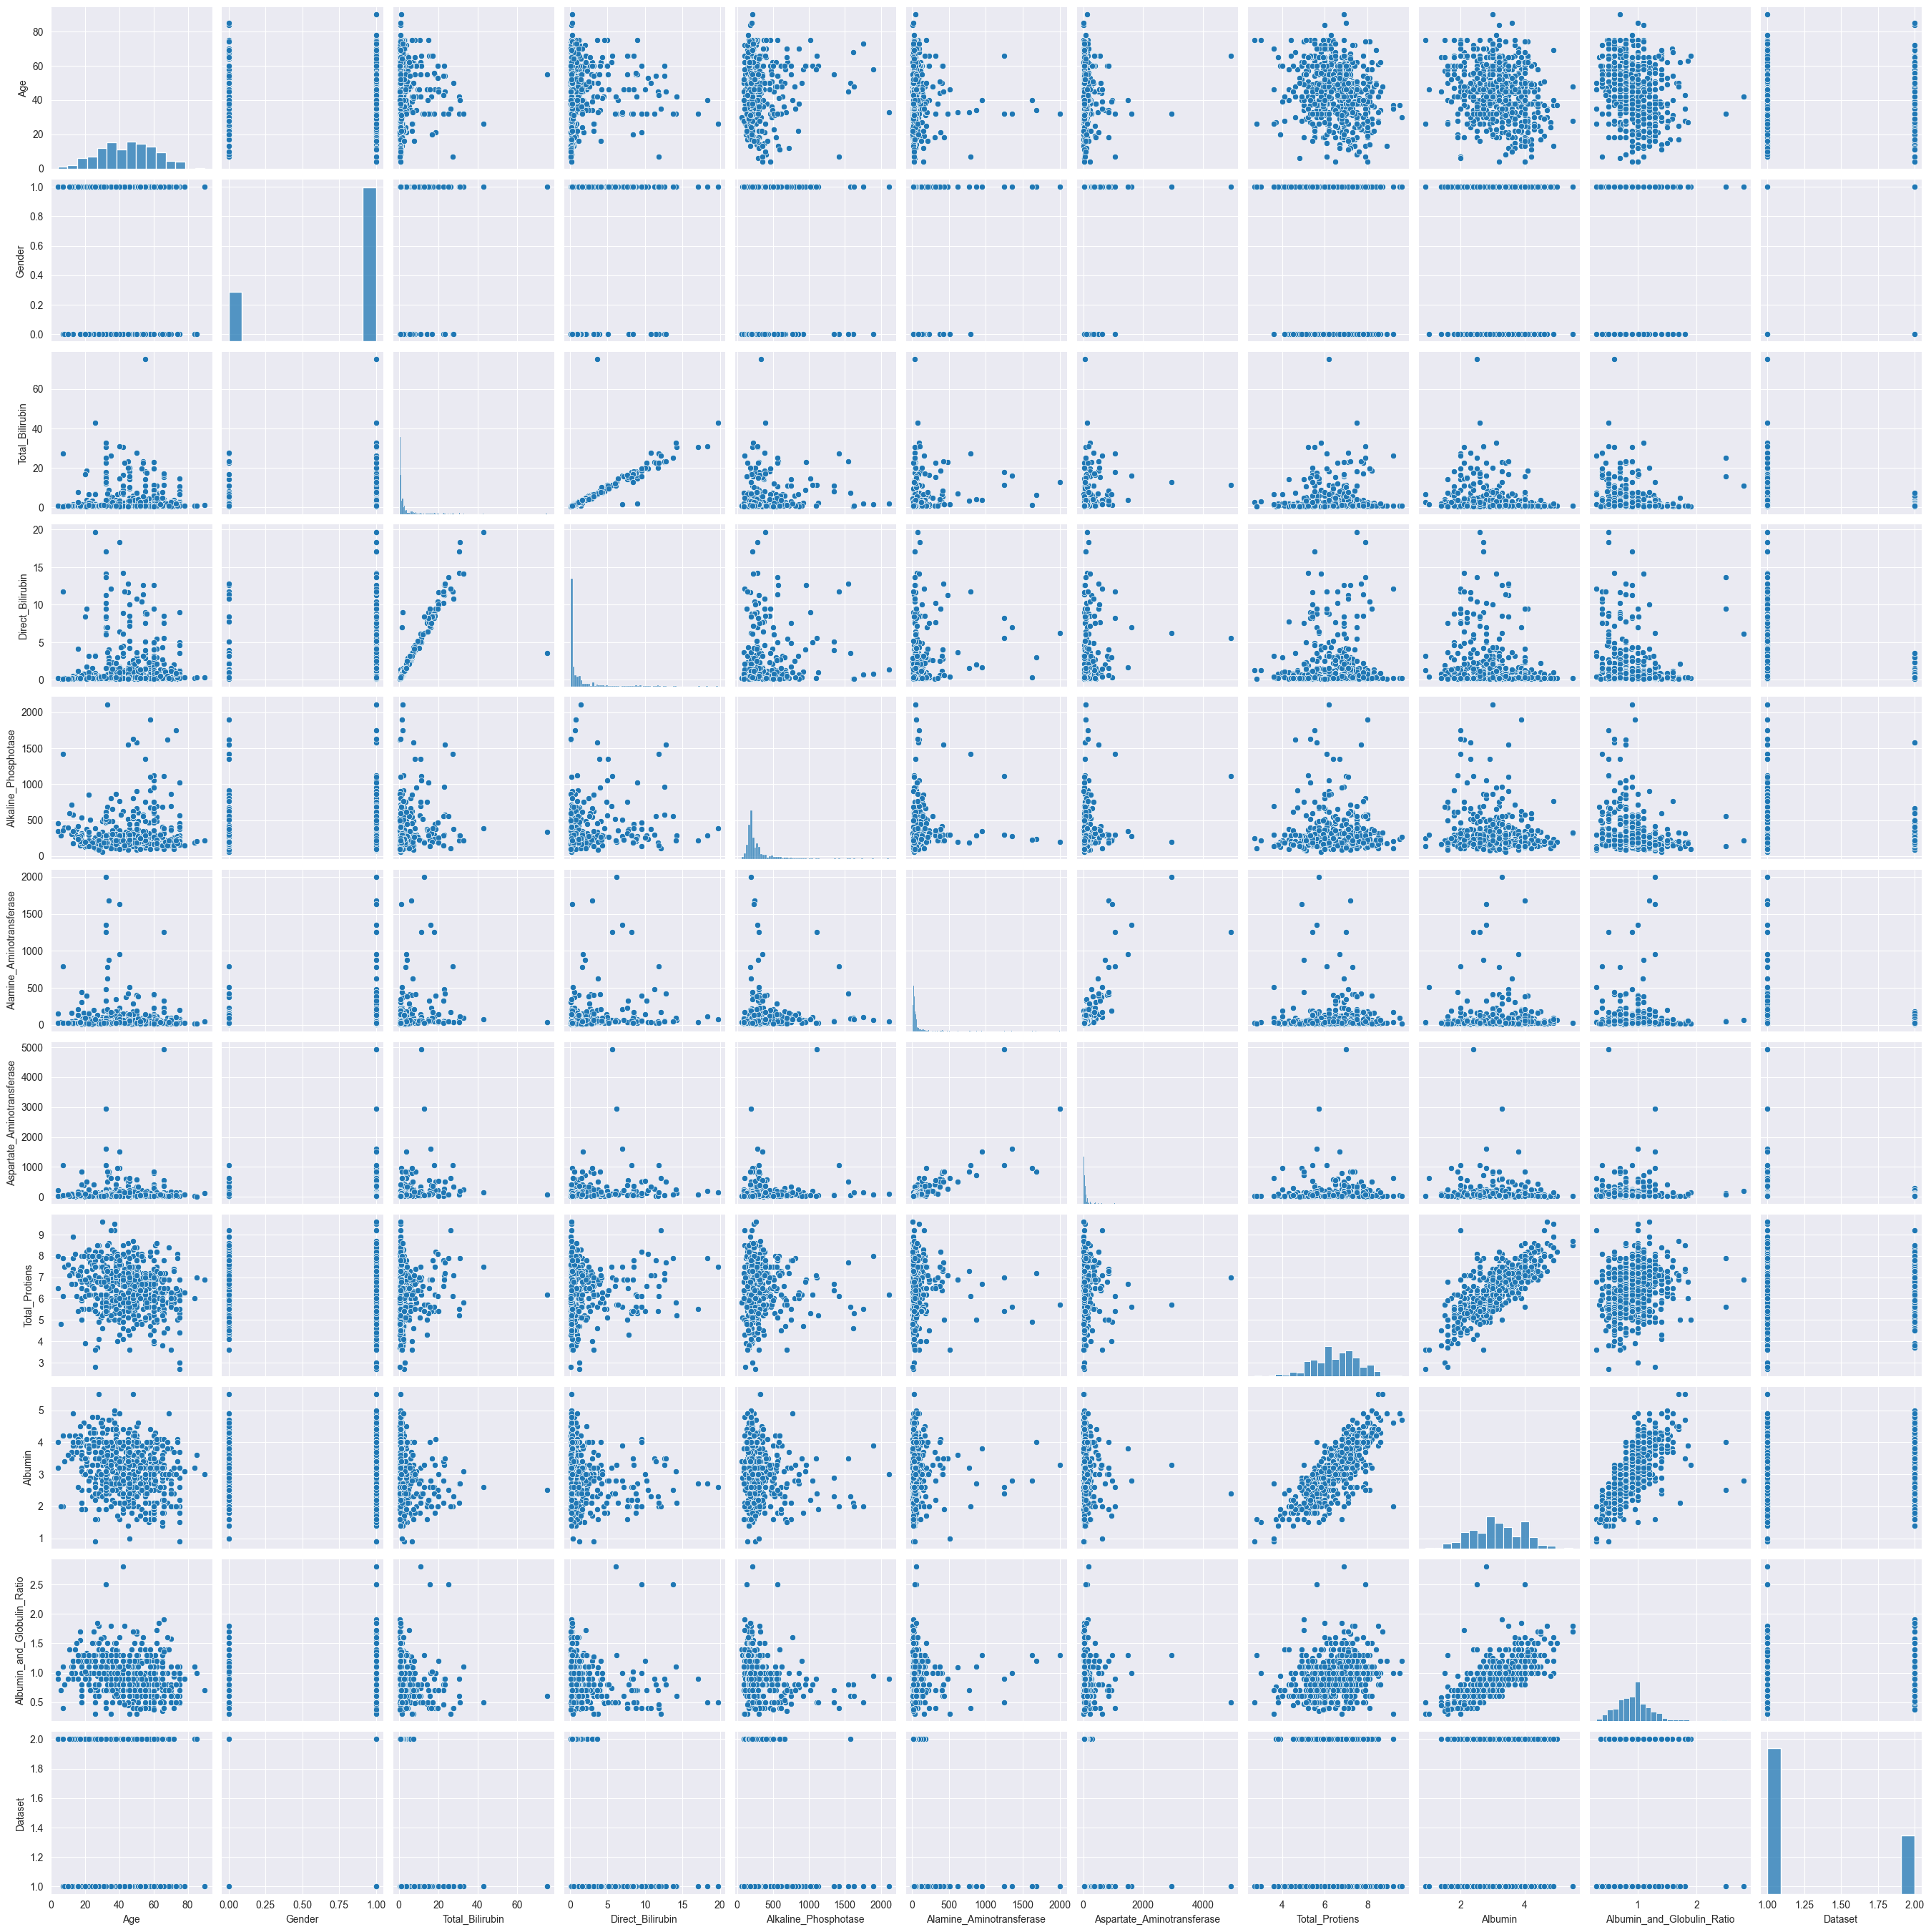

In [15]:
sns.pairplot(patients)

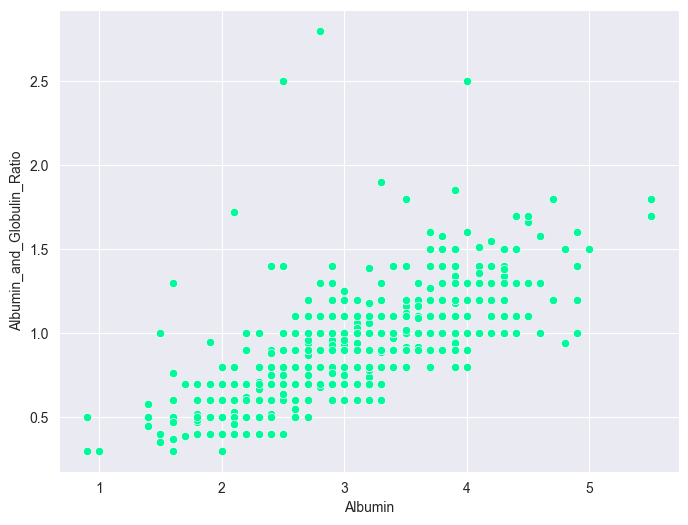

In [16]:
#compare the albumin and albumin and globulin ratio by a scatterplot.
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

<Axes: xlabel='Gender'>

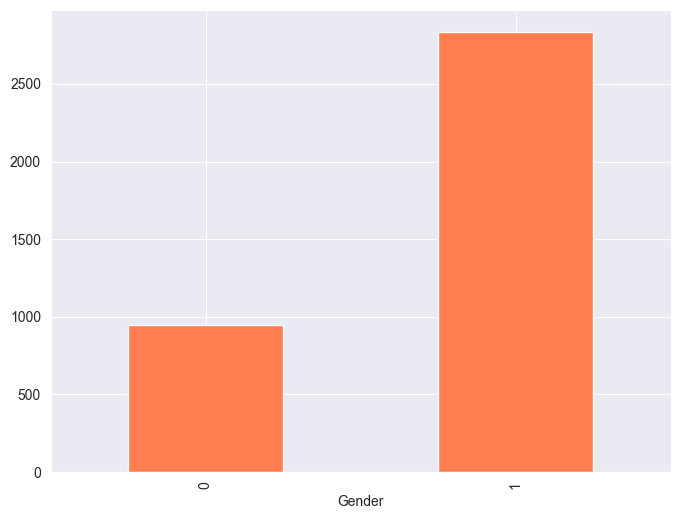

In [17]:
#comparing the Gender based on the Protein Intake.
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<Axes: xlabel='Gender'>

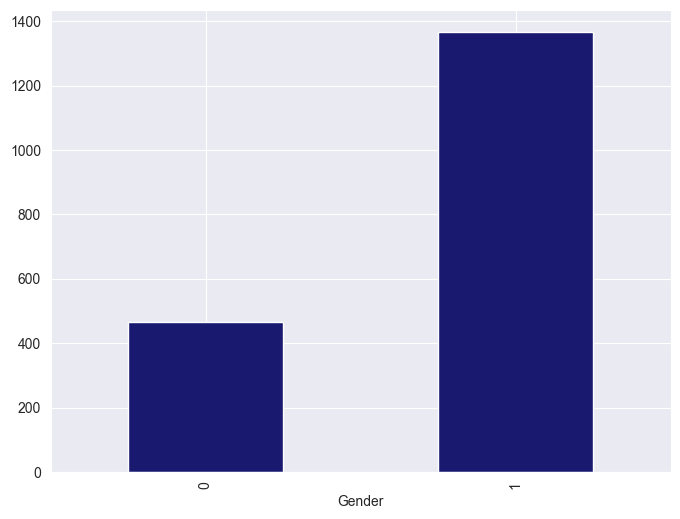

In [18]:
#compare male and female based on Albumin Level.
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<Axes: xlabel='Gender'>

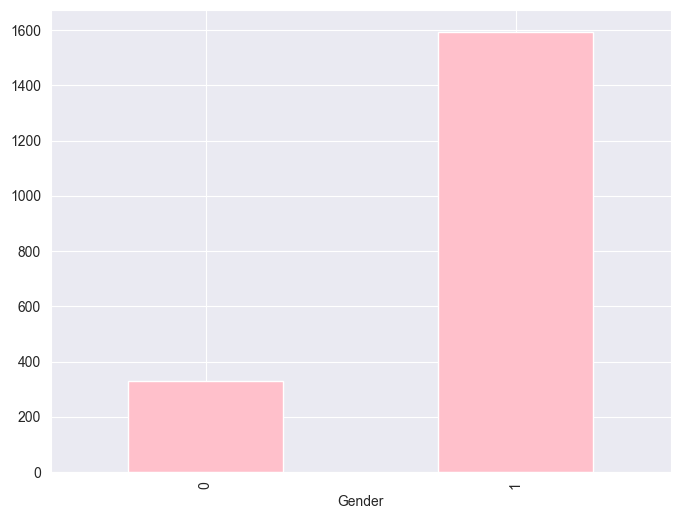

In [19]:
#Finally comparing based on the Bilirubin content.
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='pink')

In [20]:
#check the correlation between the features using a heatmap:
corr=patients.corr()

<Axes: >

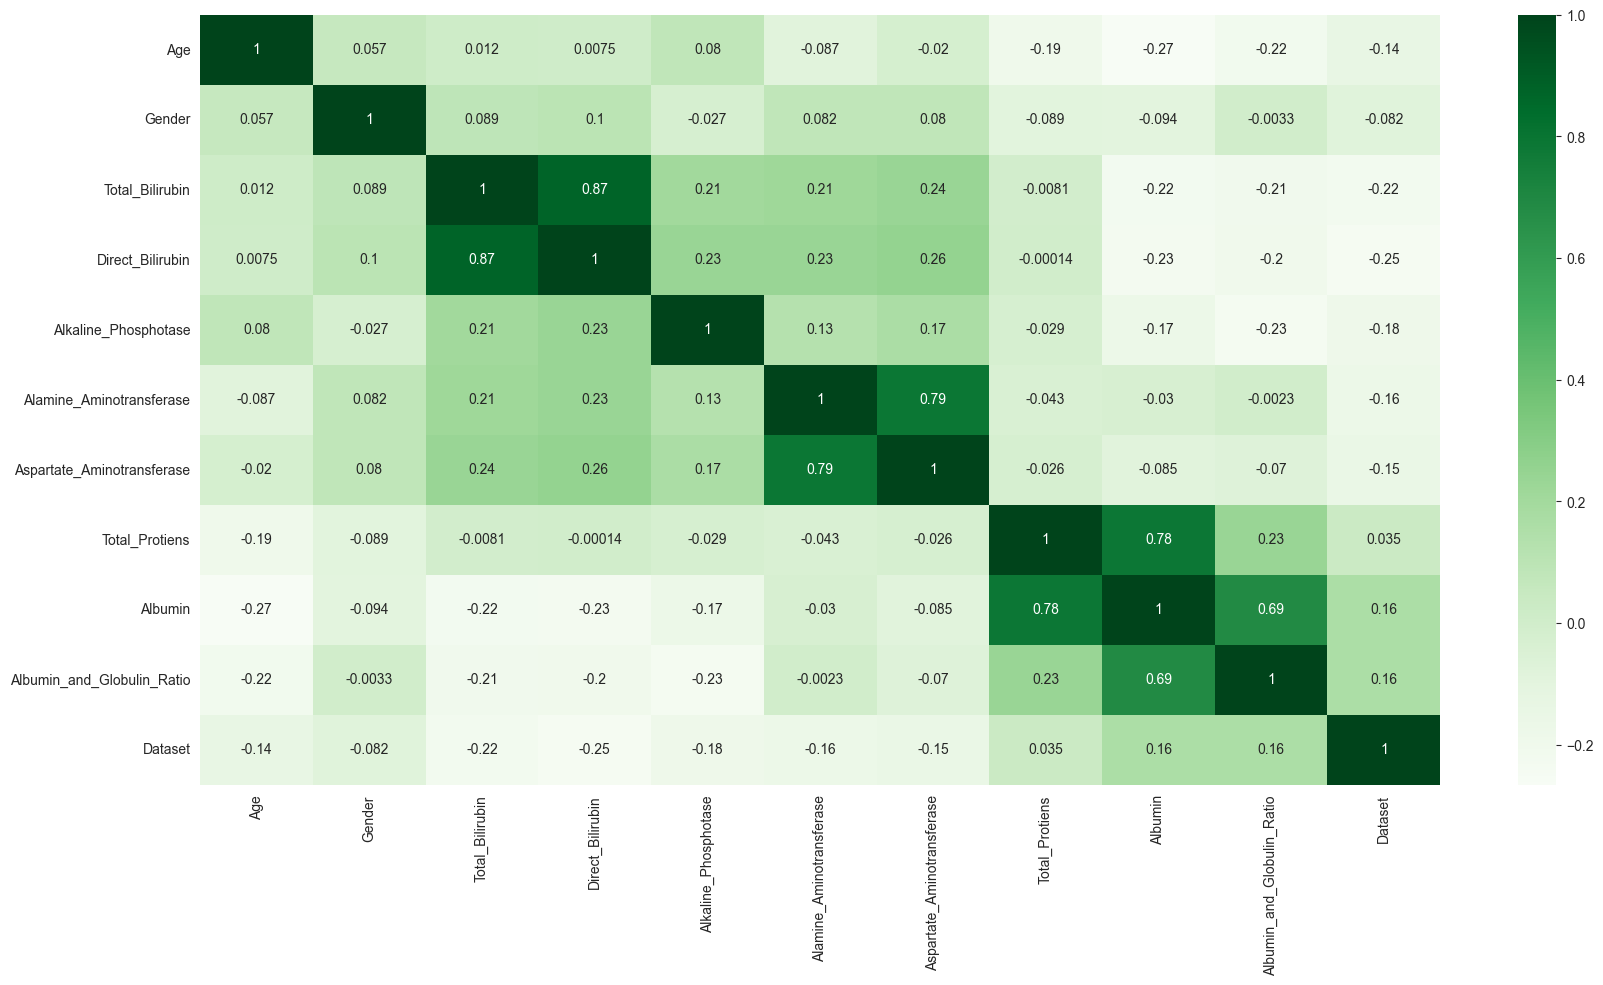

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [22]:
#Now building our model.
#Inorder to build a successful model we have to train and test the model.
from sklearn.model_selection import train_test_split

In [23]:
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [24]:
#define our X and y.
#Here X is our features and y is our target.
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [26]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#split the training and testing in a certain ratio as 70 for training and 30 for testing.
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [29]:
# Predicting the output 
log_y_pred = logmodel.predict(X_test)

<Axes: >

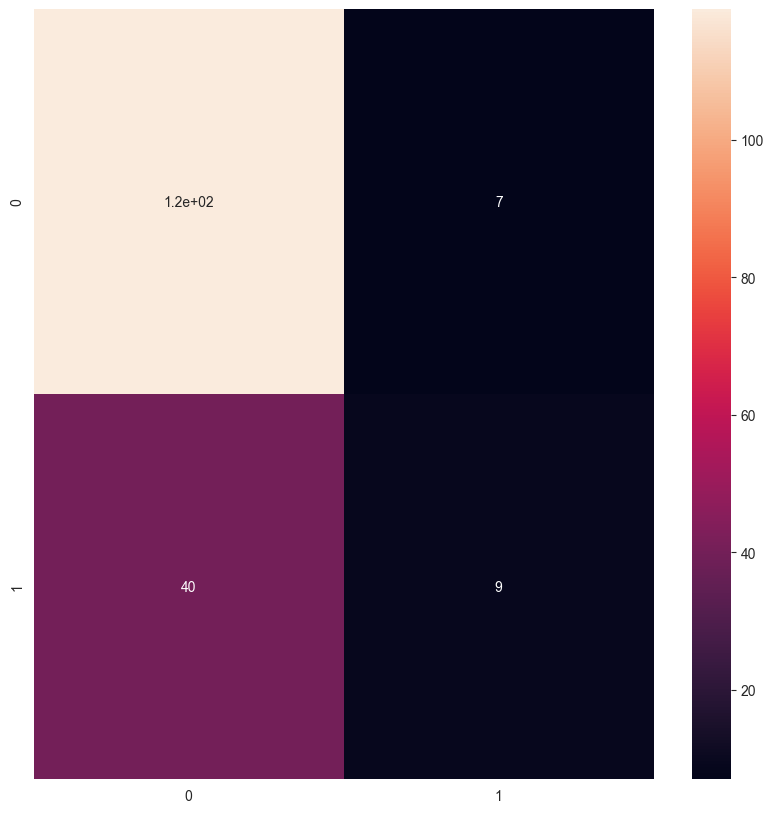

In [30]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm , annot=True)

In [31]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test , log_y_pred))

0.7314285714285714
0.7484276729559748


In [32]:
#Saving the model
import pickle
pickle.dump(logmodel, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))